### Explore
Open the training file and get the stats from each field.

In [ ]:
import math
import pandas as pd
import numpy as np
from datetime import date

In [ ]:
df = pd.read_csv('train.csv')
df.head()

,id,artists,name,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,popularity
0,7pQSmQ0l7QdBeL9X6CEMbH,['Erroll Garner'],I'll Remember April - Original Edited Concert ...,1955,0.92300,0.438,257693,0.602,0,0.658000,8,0.9500,-14.565,1,1955,0.0408,122.289,0.546,24
1,2g8MTBFRUSFKbY5RQiSSEE,['Maison & Dragen'],Chinese New Year - Radio Edit,2014,0.00019,0.477,193968,0.834,0,0.978000,4,0.3960,-6.534,0,2014-05-02,0.0396,130.007,0.516,0
2,2LcJoQ5SDUZrC2qUjWMEdF,"['Yoel Lerner', 'Mazi Cohen']",השפן הקטן,1981,0.90000,0.617,56827,0.272,0,0.000000,7,0.0879,-16.818,1,1981-04-01,0.0577,83.244,0.807,38
3,6RzHyUtRNARYyn2AIuoLnY,['Barbra Streisand'],Run Wild,1980,0.29400,0.377,247467,0.269,0,0.000478,4,0.1440,-16.766,1,1980-09-23,0.0268,82.302,0.196,40
4,6Kd0I5es8911FZpYhFS053,['Willie Nelson'],Till I Gain Control Again - Live,1975,0.49400,0.501,351560,0.218,0,0.008110,0,0.2970,-13.045,1,1975,0.0283,77.854,0.239,20


In [ ]:
df.isnull().any()

id                  False
artists             False
name                False
year                False
acousticness        False
danceability        False
duration_ms         False
energy              False
explicit            False
instrumentalness    False
key                 False
liveness            False
loudness            False
mode                False
release_date        False
speechiness         False
tempo               False
valence             False
popularity          False
dtype: bool

In [ ]:
df[['year','acousticness','danceability','duration_ms','energy','explicit',
    'instrumentalness','key','liveness','loudness','mode','speechiness',
    'tempo','valence','popularity']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,129172.0,1976.579762,26.722407,1920.0,1955.0000,1977.000000,1998.0000,2021.000
acousticness,129172.0,0.501950,0.379088,0.0,0.0918,0.523000,0.8950,0.996
danceability,129172.0,0.536076,0.175803,0.0,0.4140,0.547000,0.6680,0.988
duration_ms,129172.0,232889.509034,149266.930077,4937.0,166293.0000,205666.500000,265840.0000,5338302.000
energy,129172.0,0.481096,0.271778,0.0,0.2480,0.463000,0.7070,1.000
explicit,129172.0,0.067956,0.251671,0.0,0.0000,0.000000,0.0000,1.000
instrumentalness,129172.0,0.194286,0.332443,0.0,0.0000,0.000483,0.2340,1.000
key,129172.0,5.207050,3.516778,0.0,2.0000,5.000000,8.0000,11.000
liveness,129172.0,0.211519,0.180989,0.0,0.0993,0.138000,0.2700,1.000
loudness,129172.0,-11.767025,5.679598,-60.0,-14.9050,-10.868000,-7.5320,3.855


In [ ]:
from scipy.stats import normaltest

normaltest(df['popularity'])

NormaltestResult(statistic=25229.162045556717, pvalue=0.0)

In [ ]:
df[['popularity', 'year','acousticness','danceability','duration_ms','energy','explicit',
    'instrumentalness','key','liveness','loudness','mode','speechiness',
    'tempo','valence']].corr(method='spearman')['popularity'].sort_values()

acousticness       -0.412192
instrumentalness   -0.283584
speechiness        -0.177097
liveness           -0.112060
key                 0.000284
mode                0.009511
valence             0.061918
tempo               0.098921
danceability        0.106755
explicit            0.124262
duration_ms         0.188975
energy              0.352367
loudness            0.360841
year                0.539126
popularity          1.000000
Name: popularity, dtype: float64

In [ ]:
from scipy.stats import mannwhitneyu

tmp1 = df[df['mode']==1]['popularity']
tmp2 = df[df['mode']==0]['popularity']

mannwhitneyu(df[df['mode']==1]['popularity'],
             df[df['mode']==0]['popularity'])

MannwhitneyuResult(statistic=1718151398.0, pvalue=0.0003151434410428806)

In [ ]:
df.groupby('mode')['popularity'].describe()

,count,mean,std,min,25%,50%,75%,max
mode,,,,,,,,
0,38252.0,25.793266,22.747236,0.0,0.0,25.0,43.0,95.0
1,90920.0,25.966982,21.499368,0.0,2.0,26.0,42.0,96.0


In [ ]:
from scipy.stats import mannwhitneyu

mannwhitneyu(df[df['explicit']==1]['popularity'],
             df[df['explicit']==0]['popularity'])

MannwhitneyuResult(statistic=378716535.0, pvalue=0.0)

In [ ]:
df.groupby('explicit')['popularity'].describe()

,count,mean,std,min,25%,50%,75%,max
explicit,,,,,,,,
0,120394.0,25.010424,21.095325,0.0,1.0,25.0,41.0,94.0
1,8778.0,38.329574,27.814539,0.0,0.0,45.0,62.0,96.0


In [ ]:
from scipy.stats import kruskal

kruskal(df[df['key']==0]['popularity'],
        df[df['key']==1]['popularity'],
        df[df['key']==2]['popularity'],
        df[df['key']==3]['popularity'],
        df[df['key']==4]['popularity'],
        df[df['key']==5]['popularity'],
        df[df['key']==6]['popularity'],
        df[df['key']==7]['popularity'],
        df[df['key']==8]['popularity'],
        df[df['key']==9]['popularity'],
        df[df['key']==10]['popularity'],
        df[df['key']==11]['popularity'])

In [ ]:
df.groupby('key')['popularity'].describe()

,count,mean,std,min,25%,50%,75%,max
key,,,,,,,,
0,16211.0,26.029054,21.138735,0.0,4.0,26.0,41.0,96.0
1,10081.0,25.796151,24.063532,0.0,0.0,24.0,46.0,92.0
2,14002.0,27.043494,21.055402,0.0,4.0,28.0,42.0,92.0
3,5361.0,21.059131,21.181264,0.0,0.0,16.0,37.0,89.0
4,9877.0,27.588944,21.619297,0.0,3.0,29.0,44.0,95.0
5,12321.0,24.596137,21.294111,0.0,2.0,23.0,40.0,90.0
6,6836.0,26.422762,23.981150,0.0,0.0,26.0,46.0,91.0
7,15798.0,26.165844,21.042955,0.0,3.0,26.0,42.0,94.0
8,7955.0,25.118416,22.704729,0.0,1.0,22.0,43.0,92.0


# Plots
Generate the plots of feature and target.

In [ ]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

df = pd.read_csv('train.csv')

<AxesSubplot:xlabel='year', ylabel='Popularity'>

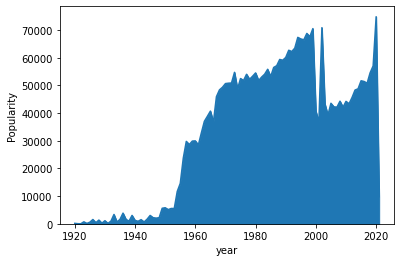

In [ ]:
tmp = df[['year', 'popularity']]
tmp.groupby(['year']).sum().plot.area(legend=False, ylabel='Popularity')

<AxesSubplot:xlabel='loudness', ylabel='Popularity'>

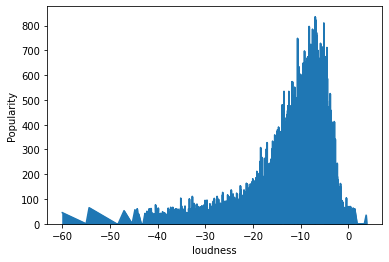

In [ ]:
tmp = df[['loudness', 'popularity']]
tmp.groupby(['loudness']).sum().plot.area(legend=False, ylabel='Popularity')

<AxesSubplot:xlabel='energy', ylabel='Popularity'>

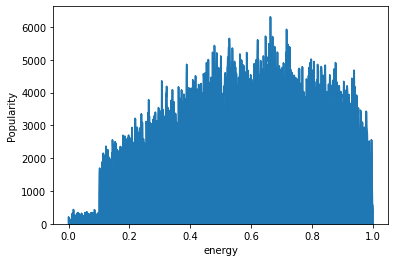

In [ ]:
tmp = df[['energy', 'popularity']]
tmp.groupby(['energy']).sum().plot.area(legend=False, ylabel='Popularity')

<AxesSubplot:xlabel='danceability', ylabel='Popularity'>

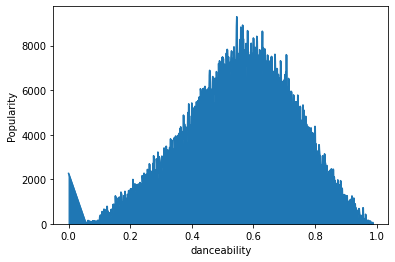

In [ ]:
tmp = df[['danceability', 'popularity']]
tmp.groupby(['danceability']).sum().plot.area(legend=False, ylabel='Popularity')

<AxesSubplot:xlabel='tempo', ylabel='Popularity'>

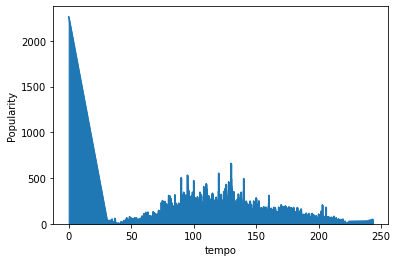

In [ ]:
tmp = df[['tempo', 'popularity']]
tmp.groupby(['tempo']).sum().plot.area(legend=False, ylabel='Popularity')

<AxesSubplot:xlabel='valence', ylabel='Popularity'>

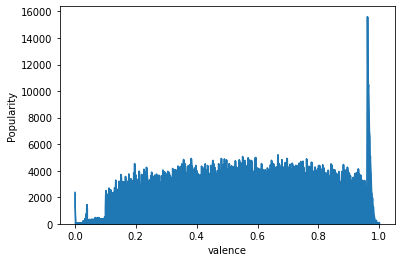

In [ ]:
tmp = df[['valence', 'popularity']]
tmp.groupby(['valence']).sum().plot.area(legend=False, ylabel='Popularity')

<AxesSubplot:xlabel='duration_ms', ylabel='Popularity'>

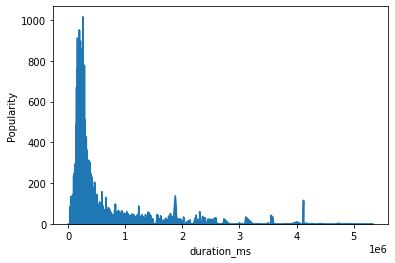

In [ ]:
tmp = df[['duration_ms', 'popularity']]
tmp.groupby(['duration_ms']).sum().plot.area(legend=False, ylabel='Popularity')

<AxesSubplot:xlabel='liveness', ylabel='Popularity'>

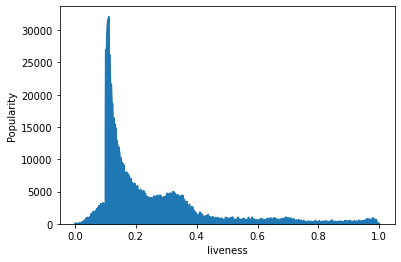

In [ ]:
tmp = df[['liveness', 'popularity']]
tmp.groupby(['liveness']).sum().plot.area(legend=False, ylabel='Popularity')

<AxesSubplot:xlabel='speechiness', ylabel='Popularity'>

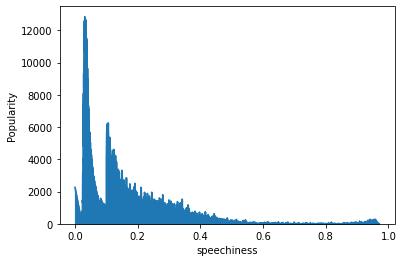

In [ ]:
tmp = df[['speechiness', 'popularity']]
tmp.groupby(['speechiness']).sum().plot.area(legend=False, ylabel='Popularity')

<AxesSubplot:xlabel='instrumentalness', ylabel='Popularity'>

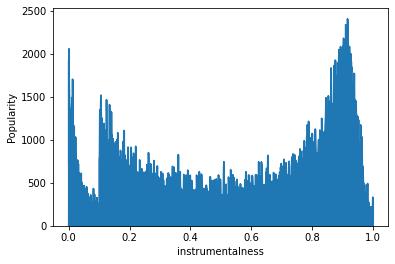

In [ ]:
tmp = df[['instrumentalness', 'popularity']]
tmp = tmp[tmp['instrumentalness'] > 0]
tmp.groupby(['instrumentalness']).sum().plot.area(legend=False, ylabel='Popularity')

<AxesSubplot:xlabel='acousticness', ylabel='Popularity'>

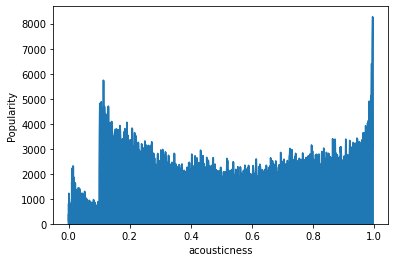

In [ ]:
tmp = df[['acousticness', 'popularity']]
tmp.groupby(['acousticness']).sum().plot.area(legend=False, ylabel='Popularity')

<AxesSubplot:xlabel='mode', ylabel='Popularity'>

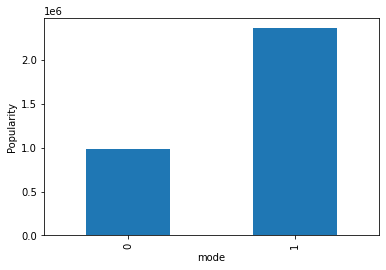

In [ ]:
tmp = df[['mode', 'popularity']]
tmp.groupby(['mode']).sum().plot.bar(legend=False, ylabel='Popularity')

<AxesSubplot:xlabel='explicit', ylabel='Popularity'>

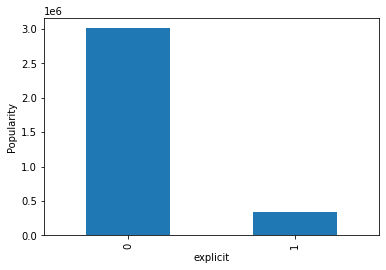

In [ ]:
tmp = df[['explicit', 'popularity']]
tmp.groupby(['explicit']).sum().plot.bar(legend=False, ylabel='Popularity')

<AxesSubplot:xlabel='key', ylabel='Popularity'>

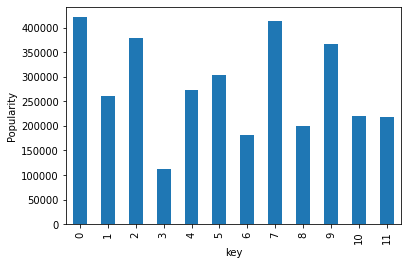

In [ ]:
tmp = df[['key', 'popularity']]
tmp.groupby(['key']).sum().plot.bar(legend=False, ylabel='Popularity')

<AxesSubplot:xlabel='Popularity', ylabel='Qty'>

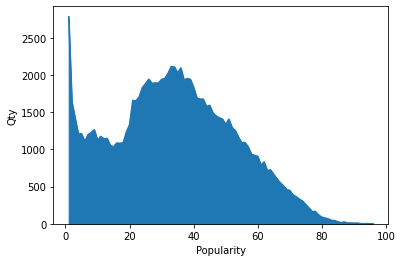

In [ ]:
tmp = df[['popularity', 'id']]
tmp = tmp[tmp['popularity'] > 0]
tmp.groupby(['popularity']).count().plot.area(legend=False, ylabel='Qty', xlabel='Popularity')

# Prepare Data
Create new fields, check its stats.

In [ ]:
import pandas as pd
df = pd.read_csv('train.csv')

In [ ]:
def getArtistPop(data):
    art1    = {}
    art2    = {}
    art_pop = {}
    
    for index, row in data.iterrows():
        txts = eval(row['artists'])
        for txt in txts:
            if txt in art1:
                art1[txt] += row['popularity']
                art2[txt] += 1
            else:
                art1[txt] = row['popularity']
                art2[txt] = 1
    
    sum = 0;
    qty = 0;
    for txt in art1:
        art_pop[txt] = art1[txt] / art2[txt]
        sum = sum + art_pop[txt]
        qty = qty + 1
    art_pop['IMPUTE_VALUE'] = sum / qty
    return art_pop;

art_pop = getArtistPop(df)

In [ ]:
import csv
ap_file = open('data/art_pop.csv', "w")

ap_writer = csv.writer(ap_file)
ap_writer.writerow(['artist', 'popularity'])
for key, value in art_pop.items():
    ap_writer.writerow([key, value])

ap_file.close()

In [ ]:
def getArtistPop(artists):
    sum = 0
    qty = 0
    txts = eval(artists)
    for txt in txts:
        if txt in art_pop:
            sum += art_pop[txt]
        else:
            sum += art_pop['IMPUTE_VALUE']
        qty = qty + 1
    if qty == 0:
        qty = 1
    return (sum / qty)

df['artists_popularity'] = df.apply(lambda row : getArtistPop(row['artists']), axis = 1)

In [ ]:
def getArtistQty(artists):
    return len(eval(artists))

df['artists_n'] = df.apply(lambda row : getArtistQty(row['artists']), axis = 1)

In [ ]:
from datetime import date

def date2int(rdate):
    txt = rdate.split('-')
    day = 0;
    res = int(txt[0])
    
    if (len(txt) == 2):
        tmp = date(int(txt[0]), int(txt[1]), 1)
        day = tmp.toordinal() - date(tmp.year, 1, 1).toordinal() + 1
    elif (len(txt) == 3):
        tmp = date(int(txt[0]), int(txt[1]), int(txt[2]))
        day = tmp.toordinal() - date(tmp.year, 1, 1).toordinal() + 1
    
    res = res + (day / 365)
    return res

df['year_i'] = df.apply(lambda row : date2int(row['release_date']), axis = 1)

In [ ]:
def getNameLen(name):
    return len(name)

df['name_len'] = df.apply(lambda row : getNameLen(row['name']), axis = 1)

In [ ]:
df[['year_i','name_len','artists_n','artists_popularity']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year_i,129172.0,1976.877996,26.815669,1920.0,1955.00274,1977.000000,1998.572603,2021.063014
name_len,129172.0,24.941086,17.940954,1.0,13.00000,20.000000,32.000000,222.000000
artists_n,129172.0,1.345826,0.904942,1.0,1.00000,1.000000,1.000000,27.000000
artists_popularity,129172.0,25.970696,19.698525,0.0,4.90812,28.573684,39.698795,90.000000


In [ ]:
df[['year_i','name_len','artists_n',
    'artists_popularity','popularity']].corr(method='spearman')['popularity'].sort_values()

name_len             -0.294107
artists_n            -0.196834
year_i                0.538660
artists_popularity    0.911011
popularity            1.000000
Name: popularity, dtype: float64

* Get the language of the song from the pre-generated file

In [ ]:
langs = pd.read_csv('data/train_name_lan.csv')
df['name_lan'] = langs['name_lan']

In [ ]:
df[['popularity', 'name_lan']].groupby('name_lan').describe()

popularity                                                      
              count       mean        std   min    25%   50%    75%   max
name_lan                                                                 
1           68362.0  28.645710  20.564520   0.0  10.00  29.0  43.00  92.0
2            9267.0  24.061077  21.940434   0.0   1.00  22.0  40.00  95.0
3            5952.0  28.346438  23.027508   0.0   0.00  33.0  47.00  90.0
4            5146.0  17.896036  21.882553   0.0   0.00   5.0  35.00  91.0
5            3880.0  21.346134  22.031020   0.0   0.00  16.0  39.00  96.0
6            3961.0  19.412775  22.913144   0.0   0.00   3.0  39.00  90.0
7            2518.0  30.013106  21.620821   0.0  10.00  31.0  46.00  87.0
8            2838.0  24.776956  22.919806   0.0   0.00  23.5  43.00  92.0
9            1908.0  31.462264  21.518986   0.0  13.00  32.0  47.00  88.0
10           3707.0  15.476666  21.047403   0.0   0.00   0.0  30.00  91.0
11           1517.0  29.978906  21.848201   0.0  11.00  30.0  46.00  87.0
12           1749.0  25.068611  22.724116   0.0   1.00  23.0  43.00  83.0
13           1717.0  23.328480  23.996998   0.0   0.00  20.0  43.00  94.0
14           1170.0  31.382051  21.810762   0.0  11.00  33.0  47.75  88.0
15           1072.0  32.070896  21.952130   0.0  14.00  32.0  48.00  94.0
16           1445.0  23.744637  22.907842   0.0   0.00  22.0  41.00  82.0
17           1576.0  19.159264  23.207867   0.0   0.00   5.0  37.00  85.0
18           1107.0  25.322493  22.763821   0.0   0.00  25.0  43.00  82.0
19           1078.0  24.978664  22.620738   0.0   0.00  24.0  42.75  84.0
20            744.0  31.380376  21.513755   0.0  12.75  32.0  47.25  88.0
21           1018.0  23.052063  22.267707   0.0   0.00  20.0  40.00  82.0
22           1359.0  14.696836  22.512983   0.0   0.00   0.0  31.50  91.0
23            529.0  22.130435  24.083582   0.0   0.00  12.0  41.00  81.0
24            443.0  22.399549  23.990113   0.0   0.00  16.0  42.00  83.0
25            313.0  28.894569  22.659797   0.0   3.00  33.0  47.00  85.0
26            415.0  22.149398  23.061393   0.0   0.00  15.0  40.00  85.0
27            274.0  30.218978  22.669052   0.0   9.00  31.0  48.75  93.0
28            208.0  36.605769  27.831765   0.0   5.00  37.0  62.25  90.0
29            260.0  25.892308  20.188779   0.0   2.00  32.5  44.00  75.0
30            190.0  31.757895  23.684083   0.0   7.75  31.0  51.00  81.0
31            228.0  24.127193  24.340401   0.0   0.00  21.5  46.00  78.0
32            148.0  35.000000  17.948528   0.0  26.00  35.0  45.25  81.0
33            117.0  28.692308  29.334122   0.0   0.00  20.0  58.00  82.0
34             94.0  30.659574  23.514605   0.0   1.50  34.0  50.75  81.0
35             62.0  41.290323  20.656747   0.0  31.25  40.5  54.75  94.0
36             71.0  26.112676  20.590948   0.0   1.00  34.0  43.00  61.0
37           1834.0   0.834242   6.059426   0.0   0.00   0.0   0.00  76.0
38            289.0   5.228374   7.020043   0.0   1.00   2.0   7.00  42.0
39             39.0  29.435897  19.615776   0.0   7.00  38.0  44.50  57.0
40             29.0  35.862069   7.827261   0.0  35.00  38.0  39.00  44.0
41             11.0  28.909091  25.181162   0.0   1.00  36.0  50.50  64.0
42             14.0  14.428571  20.368582   0.0   0.00   0.0  37.00  50.0
43             16.0   3.937500   6.951918   0.0   0.00   0.0   4.00  23.0
44             34.0   1.294118   7.545938   0.0   0.00   0.0   0.00  44.0
45              2.0  14.500000   0.707107  14.0  14.25  14.5  14.75  15.0
46            461.0   0.039046   0.243602   0.0   0.00   0.0   0.00   3.0

In [ ]:
from scipy.stats import kruskal

kruskal(df[df['name_lan']==1]['popularity'],
        df[df['name_lan']==2]['popularity'],
        df[df['name_lan']==3]['popularity'],
        df[df['name_lan']==4]['popularity'],
        df[df['name_lan']==5]['popularity'],
        df[df['name_lan']==6]['popularity'],
        df[df['name_lan']==7]['popularity'],
        df[df['name_lan']==8]['popularity'],
        df[df['name_lan']==9]['popularity'],
        df[df['name_lan']==10]['popularity'],
        df[df['name_lan']==11]['popularity'],
        df[df['name_lan']==12]['popularity'],
        df[df['name_lan']==13]['popularity'],
        df[df['name_lan']==14]['popularity'],
        df[df['name_lan']==15]['popularity'],
        df[df['name_lan']==16]['popularity'],
        df[df['name_lan']==17]['popularity'],
        df[df['name_lan']==18]['popularity'],
        df[df['name_lan']==19]['popularity'],
        df[df['name_lan']==20]['popularity'],
        df[df['name_lan']==21]['popularity'],
        df[df['name_lan']==22]['popularity'],
        df[df['name_lan']==23]['popularity'],
        df[df['name_lan']==24]['popularity'],
        df[df['name_lan']==25]['popularity'],
        df[df['name_lan']==26]['popularity'],
        df[df['name_lan']==27]['popularity'],
        df[df['name_lan']==28]['popularity'],
        df[df['name_lan']==29]['popularity'],
        df[df['name_lan']==30]['popularity'],
        df[df['name_lan']==31]['popularity'],
        df[df['name_lan']==32]['popularity'],
        df[df['name_lan']==33]['popularity'],
        df[df['name_lan']==34]['popularity'],
        df[df['name_lan']==35]['popularity'],
        df[df['name_lan']==36]['popularity'],
        df[df['name_lan']==37]['popularity'],
        df[df['name_lan']==38]['popularity'],
        df[df['name_lan']==39]['popularity'],
        df[df['name_lan']==40]['popularity'],
        df[df['name_lan']==41]['popularity'],
        df[df['name_lan']==42]['popularity'],
        df[df['name_lan']==43]['popularity'],
        df[df['name_lan']==44]['popularity'],
        df[df['name_lan']==45]['popularity'],
        df[df['name_lan']==46]['popularity'])

KruskalResult(statistic=9665.035583991425, pvalue=0.0)

In [ ]:
df[['year_i','name_len','artists_n', 'name_lan',
    'artists_popularity','popularity']].corr(method='spearman')['popularity'].sort_values()

name_len             -0.294107
artists_n            -0.196834
name_lan             -0.162169
year_i                0.538660
artists_popularity    0.911011
popularity            1.000000
Name: popularity, dtype: float64

In [ ]:
df[['year_i','name_len','artists_n','name_lan','artists_popularity']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year_i,129172.0,1976.877996,26.815669,1920.0,1955.00274,1977.000000,1998.572603,2021.063014
name_len,129172.0,24.941086,17.940954,1.0,13.00000,20.000000,32.000000,222.000000
artists_n,129172.0,1.345826,0.904942,1.0,1.00000,1.000000,1.000000,27.000000
name_lan,129172.0,5.492746,8.005302,1.0,1.00000,1.000000,7.000000,46.000000
artists_popularity,129172.0,25.970696,19.698525,0.0,4.90812,28.573684,39.698795,90.000000


In [ ]:
save = df[['year', 'acousticness', 'danceability', 'duration_ms', 'energy', 'explicit', 'instrumentalness',
           'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence', 'popularity',
           'artists_popularity', 'artists_n', 'name_len', 'name_lan']]
save.to_csv('data/train_new.csv', index = False)

### New Features Validation

In [ ]:
rmse = [0.0, 0.0]

In [ ]:
import pandas as pd
df = pd.read_csv('train.csv')
df = df[['year', 'acousticness', 'danceability', 'duration_ms', 'energy', 'explicit', 'instrumentalness',
           'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence', 'popularity']]
y = df.pop('popularity').values
X = df.values
X.shape, y.shape

((129172, 14), (129172,))

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

model   = LinearRegression()
scores  = cross_val_score(model, X, y, cv=5, scoring='neg_root_mean_squared_error')
rmse[0] = scores.mean()

In [ ]:
df = pd.read_csv('data/train_new.csv')
y = df.pop('popularity').values
X = df.values
X.shape, y.shape

((129172, 18), (129172,))

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

model   = LinearRegression()
scores  = cross_val_score(model, X, y, cv=5, scoring='neg_root_mean_squared_error')
rmse[1] = scores.mean()

In [ ]:
res = pd.DataFrame(
    {'model'      : ['Only Old Features', 'With New Features'],
     'rmse'       : rmse})
res['rmse'] = res['rmse'] * (-1)
res

,model,rmse
0,Only Old Features,17.162447
1,With New Features,8.987121


<AxesSubplot:xlabel='model', ylabel='RMSE'>

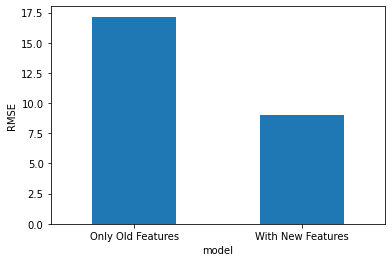

In [ ]:
res.plot.bar(x='model', rot=0, ylabel='RMSE', legend=False)

### Feature Selection

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, LogisticRegression

In [ ]:
final = pd.read_csv('data/train_new.csv')
y = final.pop('popularity').values
X = final.values
X.shape

(129172, 18)

In [ ]:
selector = SelectFromModel(LogisticRegression(penalty='l1', C=0.01, solver='liblinear'),
                           max_features=X.shape[1])
selector.fit(X, y)
selector.get_support()

array([ True,  True, False,  True, False,  True,  True,  True, False,
        True,  True, False,  True,  True,  True,  True,  True,  True])

In [ ]:
final.columns[selector.get_support()], len(final.columns[selector.get_support()])

(Index(['year', 'acousticness', 'duration_ms', 'explicit', 'instrumentalness',
        'key', 'loudness', 'mode', 'tempo', 'valence', 'artists_popularity',
        'artists_n', 'name_len', 'name_lan'],
       dtype='object'),
 14)

### Feature Validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('data/train_new.csv')
df.columns, len(df.columns)

(Index(['year', 'acousticness', 'danceability', 'duration_ms', 'energy',
        'explicit', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
        'speechiness', 'tempo', 'valence', 'popularity', 'artists_popularity',
        'artists_n', 'name_len', 'name_lan'],
       dtype='object'),
 19)

In [ ]:
df = pd.read_csv('data/train_new.csv')
df = df[['popularity', 'year', 'acousticness', 'duration_ms', 'explicit', 'instrumentalness',
        'key', 'loudness', 'mode', 'tempo', 'valence', 'artists_popularity',
        'artists_n', 'name_len', 'name_lan', 'liveness', 'energy', 'danceability', 'speechiness']]
y = df.pop('popularity').values
features = df.columns
features, len(features)

(Index(['year', 'acousticness', 'duration_ms', 'explicit', 'instrumentalness',
        'key', 'loudness', 'mode', 'tempo', 'valence', 'artists_popularity',
        'artists_n', 'name_len', 'name_lan', 'liveness', 'energy',
        'danceability', 'speechiness'],
       dtype='object'),
 18)

In [ ]:
qty = 0
rms = np.arange(14.0, len(features) + 1)

for i in range(14, len(features) + 1):
    tmp = df[features[0:i]]
    X   = tmp.values
    model = LinearRegression()
    crossval = cross_val_score(model, X, y, cv=5, scoring='neg_root_mean_squared_error')
    rms[qty] = crossval.mean()
    qty = qty + 1
    print(crossval.mean())

-9.001014049732964
-8.987957104763613
-8.987106762492887
-8.987112199272362
-8.987120661755801


In [ ]:
features2 = []

features2.append('LASSO')
for i in np.arange(14, len(features)):
    features2.append(features[i])

In [ ]:
features2, rms

(['LASSO', 'liveness', 'energy', 'danceability', 'speechiness'],
 array([-9.00101405, -8.9879571 , -8.98710676, -8.9871122 , -8.98712066]))

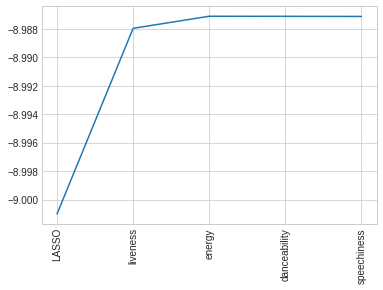

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

fig = plt.figure()
ax = plt.axes()
plt.xticks(rotation=90)
ax.plot(features2, rms);

In [ ]:
df = pd.read_csv('data/train_new.csv')
df = df[['year', 'acousticness', 'duration_ms', 'explicit', 'instrumentalness',
        'key', 'loudness', 'mode', 'tempo', 'valence', 'artists_popularity',
        'artists_n', 'name_len', 'name_lan', 'liveness', 'popularity']]
df.to_csv('data/train_features.csv', index = False)
len(df.columns)

16